__ARIMA(p,d,q)__

ARIMA in Python:

1. Define the model by calling ARIMA()1 and passing in the p, d, and q parameters.
2. The model is prepared on the training data by calling the fit() function.
3. Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.

In [1]:
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
sales = pd.read_csv(r"./Datasets/shampoo.csv",index_col=0)
dates = pd.date_range(start="1901-01-01",freq='M',periods=len(sales))
sales.index = dates

In [2]:
fit = ARIMA(sales,order=(5,1,0),dates=sales.index).fit()
# we assume 5 AR 
# one differentiation and zero Moving Average coeffs

fit.summary()

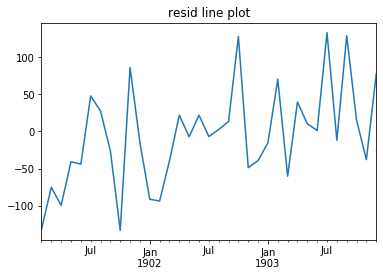

In [4]:
_ = fit.resid.plot().set(title='resid line plot')

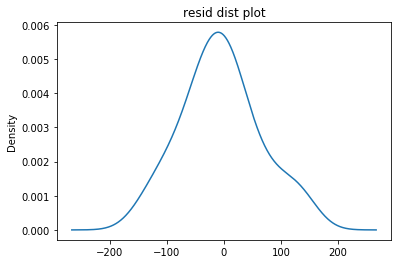

In [5]:
_ = fit.resid.plot(kind='kde').set(title="resid dist plot")

In [6]:
fit.resid.describe() # A non zero mean in error # there is bias
# it can be improved!!

count     35.000000
mean      -5.495216
std       68.132882
min     -133.296656
25%      -42.477819
50%       -7.186509
75%       24.748311
max      133.237940
dtype: float64

In [7]:
## Rolling Forecast ARIMA model

In [8]:
train , test = (sales.iloc[:int(len(sales)*.66)]
                ,sales.iloc[int(len(sales)*.66):])
fit = ARIMA(train,order=(5,1,1)).fit()

In [9]:
fit.predict(start=test.index.min()
            ,end=test.index.max()
            ,typ='levels')
# we have a better approach!!

1902-12-31    335.491648
1903-01-31    291.955401
1903-02-28    370.494539
1903-03-31    322.537330
1903-04-30    351.146941
1903-05-31    330.451088
1903-06-30    364.914958
1903-07-31    355.055916
1903-08-31    371.145113
1903-09-30    365.378108
1903-10-31    381.502919
1903-11-30    382.768957
1903-12-31    393.891917
Freq: M, dtype: float64

RMSE : 83.417


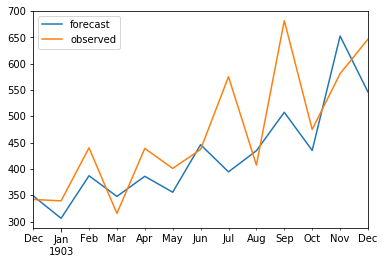

In [10]:
# Walk - forward forecast
# we will iterate over test
# sample and add the 
predictions_list = []
saleslist = sales.shift(1).dropna().values
for ind in range(len(train),len(saleslist)+1):
    fit = ARIMA(saleslist[:ind],order=(5,1,0)).fit()
    predictions_list.append(fit.forecast()[0][0])
predictions = pd.Series(predictions_list,index=test.index)
rmse = pd.np.sqrt(mean_squared_error(predictions,test))
print("RMSE : {:.3f}".format(rmse))
forecast = pd.concat([predictions,test],1)
forecast.columns = ['forecast','observed']
_=forecast.plot()

## Summary
- About the ARIMA model, how it can be configured, and assumptions made by the model.
- How to perform a quick time series analysis using the ARIMA model.
- How to use an ARIMA model to forecast out-of-sample predictions.